In [1]:
from astropy.table import Table
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import matplotlib
from astropy.wcs import WCS
from scipy import interpolate
from astropy import units as u
from astropy import constants as c

import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from astropy.io import ascii
from regions import Regions
from itertools import chain
from astropy.stats import mad_std
import os
from matplotlib import font_manager


#print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))
print(matplotlib.font_manager.get_fontconfig_fonts())
#font_path = '/home/t.yoo/computer-modern/cmunrm.ttf'
#font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname='/usr/share/fonts/urw-base35/NimbusRoman-Regular.otf')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'
w51n_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B6_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'




#catalogdir = '/Users/dbahck37/w51data/alma_imf/catalog/getsf-native/'
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'

#---------- local direc  ------------

"""

w51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'



w51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'
w51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'
"""



w51e_b3_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg'
w51e_b6_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg'

w51n_b3_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg'
w51n_b6_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg'


w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'




['/usr/share/fonts/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/urw-base35/URWBookman-Light.otf', '/usr/share/fonts/urw-base35/NimbusSans-Bold.otf', '/usr/share/fonts/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/urw-base35/NimbusMonoPS-Bold.otf', '/usr/share/fonts/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/urw-base35/NimbusSansNarrow-BoldOblique.otf', '/usr/share/fonts/urw-base35/NimbusSans-Italic.otf', '/usr/share/fonts/dejavu/DejaVuSerifCondensed.ttf', '/usr/share/fonts/dejavu/DejaVuSans-Oblique.ttf', '/usr/share/fonts/urw-base35/P052-Bold.otf', '/usr/share/fonts/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/urw-base35/NimbusSans-BoldItalic.otf', '/usr/share/fonts/dejavu/DejaVuSerif-BoldItalic.ttf', '/usr/share/fonts/dejavu/DejaVuLGCSansMono.ttf', '/usr/share/fonts/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/dejavu/DejaVuSerifCondensed-Bold.ttf', '/usr/share/fonts/urw-base35/NimbusRoman-BoldItalic.otf', '/usr/share/fonts/dejavu/D

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]
        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        

        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
def cen_freq(hdr ,alpha=2):
    
    for k in range(4):
        if hdr['CTYPE%d'%(k+1)]=='FREQ':
            hdrind = k+1
    center = hdr['CRVAL%d'%hdrind]
    delta = hdr['CDELT%d'%hdrind]
    start = center-delta/2 ; end = center+delta/2
    freqarr = np.logspace(np.log10(start),np.log10(end),20)
    dfreq = freqarr[1:]-freqarr[:-1]
    dfreq = np.append(dfreq,[dfreq[-1]])
    
    integral_up = np.sum(freqarr**(alpha+1)*dfreq)
    integral_down = np.sum(freqarr**(alpha)*dfreq)
    return integral_up/integral_down 

def count_points_in_ellipse(xcen,ycen,major,minor,pa,xpos,ypos):
    # caclulate foci positions 
    # must be full major, minor not semi major, minor
    fodx = np.cos(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    fody = np.sin(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    
    fox1 = xcen + fodx
    foy1 = ycen + fody
    
    fox2 = xcen - fodx
    foy2 = ycen - fody
    
    dist1 = np.sqrt((xpos-fox1)**2+(ypos-foy1)**2)
    dist2 = np.sqrt((xpos-fox2)**2+(ypos-foy2)**2)
    
    isinside = np.where(dist1+dist2<major)[0]
    
    return len(isinside), isinside
plt.rcParams['axes.labelsize']=30
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30
plt.rcParams['axes.titlesize']=30
plt.rcParams['legend.fontsize']=30
plt.rcParams["axes.formatter.use_mathtext"] = True




In [3]:
catalog_w51n = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')
catalog_w51e = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')
def measure_rms(data, noiseregiondir):
    fitsdata = fits.open(data)
    noiseregion= Regions.read(noiseregiondir,format='ds9')
    image = fitsdata[0].data
    if len(image.shape)!=2:
        image = fitsdata[0].data[0][0]
    wcs = WCS(fitsdata[0].header,naxis=2)

    container = []
    for reg in noiseregion:
        pix_reg = reg.to_pixel(wcs)
        noisemask = pix_reg.to_mask()
        noiseim = noisemask.cutout(image)
        container.append(noiseim.flatten())
    noiseim = list(chain.from_iterable(container))
    std = mad_std(noiseim,ignore_nan=True)
    return std

def count_source_in_image(image, xpix, ypix, kind='center'):
    nsource = len(xpix)
    isinside = []
    if kind is 'center':
        for i in range(nsource):
            if xpix[i] > image.shape[0] or ypix[i] > image.shape[1]:
                continue
            if np.isfinite(image[int(xpix[i]),int(ypix[i])]):
                isinside.append(i)
    
    return isinside
def plot_flux_b3b6(ax, cat_w51, b3_lr, b6_lr, b3_hr, b6_hr, dendrocatalog,index=None):
    cat_w51_b3 = catdata(cat_w51, band='B3')
    b3flux = cat_w51_b3.flux
    b3flux[b3flux<1e-5]=1e-5
    cat_w51_b6 = catdata(cat_w51, band='B6')
    b6flux = cat_w51_b6.flux

    hdr_lr3 = fits.getheader(b3_lr)
    freq_lr3 =cen_freq(hdr_lr3)
    hdr_lr6 = fits.getheader(b6_lr)
    freq_lr6 =cen_freq(hdr_lr6)
    
    hdr_hr3 = fits.getheader(b3_hr)
    freq_hr3 =cen_freq(hdr_hr3)
    hdr_hr6 = fits.getheader(b6_hr)
    freq_hr6 =cen_freq(hdr_hr6)
    
    alpha = np.log(b3flux/b6flux)/np.log(freq_lr3/freq_lr6)
    print(alpha)

    fitsdata = fits.open(b6_hr)
    b6highresimage = fitsdata[0].data[0][0]
    wcs_hr6 = WCS(hdr_hr6,naxis=2)
    xysky = np.vstack((cat_w51_b6.sky_ra, cat_w51_b6.sky_dec)).T
    pixxy_b6 = wcs_hr6.wcs_world2pix(xysky,0)

    ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

    dendrosky = np.vstack((dendrocatalog['x_sky'],dendrocatalog['y_sky'])).T
    highresnums = []

    for cat_w51, hdr_lr, hdr_hr in zip([cat_w51_b3, cat_w51_b6],[hdr_lr3, hdr_lr6],[hdr_hr3,hdr_hr6]):
        beam_lr = Beam.from_fits_header(hdr_lr)  
        meanbeamsize = (beam_lr.major.value+beam_lr.minor.value)/4

        xysky = np.vstack((cat_w51.sky_ra, cat_w51.sky_dec)).T
        wcs_hr = WCS(hdr_hr,naxis=2)
        pixxy_hr = wcs_hr.wcs_world2pix(xysky,0)
        scale_hr = wcs_hr.proj_plane_pixel_scales()[0]
      
        major = (cat_w51.afwhm/3600+meanbeamsize)/scale_hr.value
        minor = (cat_w51.bfwhm/3600+meanbeamsize)/scale_hr.value
        pa = 180-cat_w51.theta
        
        dendroxy = wcs_hr.wcs_world2pix(dendrosky,0)
        

        for j in range(len(major)):
            if major[j]>1e3:
                highresnums.append(0)
                continue
            highresnum, highresind = count_points_in_ellipse(pixxy_hr[j,0],pixxy_hr[j,1], major[j],minor[j],pa[j],dendroxy[:,0],dendroxy[:,1])
            highresnums.append(highresnum)
        print(highresnums)
    highresnums = (np.array(highresnums[:int(len(highresnums)/2)])+np.array(highresnums[int(len(highresnums)/2):]))/2
    
    
    beam_lr3 = Beam.from_fits_header(hdr_lr3)  
    area_ratio_b3 = cat_w51_b3.fooa * cat_w51_b3.foob / 3600**2 / (beam_lr3.major.value * beam_lr3.minor.value) 
    b3rms = measure_rms(w51n_b3_almaimf, w51n_b3_almaimf_noiseregion) 
    
    beam_lr6 = Beam.from_fits_header(hdr_lr6)  
    area_ratio_b6 = cat_w51_b6.fooa * cat_w51_b6.foob / 3600**2 / (beam_lr6.major.value * beam_lr6.minor.value) 
    b6rms = measure_rms(w51n_b6_almaimf, w51n_b6_almaimf_noiseregion)
    
    
    
    
    for i in range(len(b3flux)):
        if i in ind_inside_b6image:

            if i in cat_w51_b3.rec_ind:
                marker='*'
            elif i in cat_w51_b3.rec_ind_b3 or i in cat_w51_b3.rec_ind_b6:
                marker='^'
            else:
                marker='o'

            if i in index:
                c = 'cyan'
            else:
                c = 'k'
                
            if b6flux[i] < b6rms * area_ratio_b6[i]:
                ls = 'dashed'
            else:
                ls='solid'
            ax.plot([freq_lr3, freq_lr6],[b3flux[i], b6flux[i]],c=c,ls=ls)
            
    arr = np.ones(len(ind_inside_b6image))
    print(len(arr))
    grayind = np.where(b3flux[ind_inside_b6image]==1e-5)[0]
    nograyind = np.where(b3flux[ind_inside_b6image]>1e-5)[0]
    print('ho',grayind,nograyind)
    ss = ax.scatter(freq_lr3*arr[nograyind], b3flux[ind_inside_b6image][nograyind],
                    marker=marker, c=alpha[ind_inside_b6image][nograyind],
                    cmap=plt.get_cmap('rainbow'),vmin=-1,vmax=5 ,s=50*(1+highresnums[ind_inside_b6image][nograyind]))
    ax.scatter(freq_lr3*arr[grayind], b3flux[ind_inside_b6image][grayind],
                    marker=marker, c='gray',
                    s=50*(1+highresnums[ind_inside_b6image][grayind]))
    ss = ax.scatter(freq_lr6*arr[nograyind], b6flux[ind_inside_b6image][nograyind], marker=marker, 
                    c=alpha[ind_inside_b6image][nograyind]
                    ,cmap=plt.get_cmap('rainbow'),vmin=-1,vmax=5 ,s=50*(1+highresnums[ind_inside_b6image][nograyind]))
    ax.scatter(freq_lr6*arr[grayind], b6flux[ind_inside_b6image][grayind],
                    marker=marker, c='gray',
                    s=50*(1+highresnums[ind_inside_b6image][grayind]))
   
    
    
    
    ax.fill_between([freq_lr3, freq_lr6],[np.min(b3rms*area_ratio_b3), np.min(b6rms*area_ratio_b6)],[np.max(b3rms*area_ratio_b3), np.max(b6rms*area_ratio_b6)],color='purple',alpha=0.2)

    return ss




     FXT_BST03      
--------------------
  3.4028740488365337
   2.867482876177803
-0.30690538393180256
  3.7870932722731157
  1.5786343203097402
   3.781253390009119
   3.452903923338774
                 ...
      5.990747593669
   1.522979472868876
  1.7090029191653908
 -0.3267143125716218
-0.20340069688979348
   7.711788153183006
   7.818429410741084
Length = 127 rows
[4, 1, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 1, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

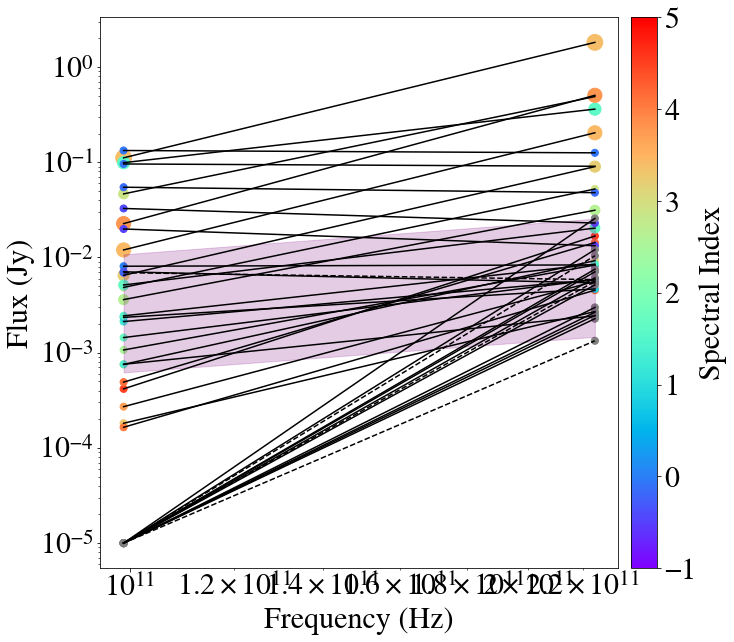

In [4]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.85])

ss = plot_flux_b3b6(ax1, cat_w51n, w51n_b3_almaimf_conv, w51n_b6_almaimf_conv, w51n_b3_tt0, w51n_b6_briggs, catalog_w51n,
                   index=[])
cax = fig.add_axes([0.92,0.1,0.04,0.85])
cbar = plt.colorbar(ss, cax=cax)
cbar.set_label('Spectral Index')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Flux (Jy)')
ax1.set_xscale('log')
ax1.set_yscale('log')



In [5]:
from functools import reduce

def plot_alpha_multiplicity(ax, cat_w51, b3_lr, b6_lr, b3_hr, b6_hr, dendrocatalog,
                            b6index=None, band='b6', marker='o',label='w51n'):
    
    cat_w51_b3 = catdata(cat_w51, band='B3')
    b3flux = cat_w51_b3.flux
    b3fluxerr = cat_w51_b3.fluxerr
    
    cat_w51_b6 = catdata(cat_w51, band='B6')
    b6flux = cat_w51_b6.flux
    b6fluxerr = cat_w51_b6.fluxerr
    
    hdr_lr3 = fits.getheader(b3_lr)
    freq_lr3 =cen_freq(hdr_lr3)
    
    hdr_lr6 = fits.getheader(b6_lr)
    freq_lr6 =cen_freq(hdr_lr6)
    
    hdr_hr3 = fits.getheader(b3_hr)
    freq_hr3 =cen_freq(hdr_hr3)
    wcs_hr3 = WCS(hdr_hr3,naxis=2)
    
    hdr_hr6 = fits.getheader(b6_hr)
    freq_hr6 =cen_freq(hdr_hr6)
    wcs_hr6 = WCS(hdr_hr6,naxis=2)

    
    fitsdata = fits.open(b6_hr)
    b6highresimage = fitsdata[0].data[0][0]
    xysky = np.vstack((cat_w51_b6.sky_ra, cat_w51_b6.sky_dec)).T
    pixxy_b6 = wcs_hr6.wcs_world2pix(xysky,0)
    ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])
    
    
    scale_hr3 = wcs_hr3.proj_plane_pixel_scales()[0]
    beam_lr3 = Beam.from_fits_header(hdr_lr3)  
    meanbeamsize = (beam_lr3.major.value+beam_lr3.minor.value)/4
    major_b3 = (cat_w51_b3.afwhm/3600+meanbeamsize)/scale_hr3.value
    
    scale_hr6 = wcs_hr6.proj_plane_pixel_scales()[0]
    beam_lr6 = Beam.from_fits_header(hdr_lr6)  
    meanbeamsize = (beam_lr6.major.value+beam_lr6.minor.value)/4
    major_b6 = (cat_w51_b6.afwhm/3600+meanbeamsize)/scale_hr6.value
    
    rec_ind_b6 = cat_w51_b6.rec_ind_b6
    
    nolarge = np.where((major_b3 < 1e3)&(major_b6 < 1e3))[0]
    
    commonind = reduce(np.intersect1d,(rec_ind_b6,ind_inside_b6image, nolarge))
    
    dendrosky = np.vstack((dendrocatalog['x_sky'], dendrocatalog['y_sky'])).T
    
    if band == 'b3':
        multiple, multipleindex = multiplicity(hdr_lr3, hdr_hr3, cat_w51_b3, dendrosky,index=commonind)
    elif band =='b6':
        multiple, multipleindex = multiplicity(hdr_lr6, hdr_hr6, cat_w51_b6, dendrosky,index=commonind)
    
    
    area_ratio_b3 = cat_w51_b3.fooa * cat_w51_b3.foob / 3600**2 / (beam_lr3.major.value * beam_lr3.minor.value) 
    b3rms = measure_rms(w51n_b3_almaimf, w51n_b3_almaimf_noiseregion) 
    
    area_ratio_b6 = cat_w51_b6.fooa * cat_w51_b6.foob / 3600**2 / (beam_lr6.major.value * beam_lr6.minor.value) 
    b6rms = measure_rms(w51n_b6_almaimf, w51n_b6_almaimf_noiseregion)
    
    b6flux_plot = b6flux[commonind]
    b3flux_plot = b3flux[commonind]

    b6belowrms = np.where(b6flux_plot/area_ratio_b6[commonind] < b6rms)[0]
    b3belowrms = np.where(b3flux_plot/area_ratio_b3[commonind] < b3rms)[0]

    no = cat_w51_b3.no
    b6flux_plot[b6belowrms] = b6rms * area_ratio_b6[commonind][b6belowrms]
    b3flux_plot[b3belowrms] = b3rms * area_ratio_b3[commonind][b3belowrms]
    

    
    si = np.log(b3flux_plot/b6flux_plot)/np.log(freq_hr3/freq_hr6)
    sierr = np.sqrt((b3fluxerr[commonind]/b3flux_plot)**2+(b6fluxerr[commonind]/b6flux_plot)**2)/np.log(freq_hr3/freq_hr6)
    
    #group1 both > rms
    rand=np.random.rand(len(commonind))*0.2
    
    indexarr = [] ;siarr=[];kindarr=[] ; multiplearr=[] ;multipleindexarr=[]
    for i in range(len(commonind)):
        if cat_w51_b6.no[commonind][i] in b6index:
            mfc = 'cyan'
        else:
            print('hohoh')
            mfc = 'orange'
        
        if i not in b6belowrms and i not in b3belowrms:
            yerr = sierr[i]
            lolims=0
            uplims=0
            mec='k'
            offset=0
            kindarr.append(0)
        elif i in b6belowrms and i not in b3belowrms:
            yerr = 99909
            lolims=0
            uplims=1
            offset=-0.8
            #mec='lime'
            kindarr.append(1)
        elif i not in b6belowrms and i in b3belowrms:
            yerr = 888
            lolims=1
            uplims=0
            offset=-0.4
            #mec='r'
            kindarr.append(2)
        else:
            continue
        indexarr.append(cat_w51_b6.no[commonind][i]-1)
        siarr.append(si[i])
        ax.errorbar(multiple[i]+offset+rand[i], si[i],yerr=yerr,fmt='.k',marker=marker, mec=mec,mfc=mfc,ms=10, capsize=3, ecolor='k',alpha=0.5,mew=2,lolims=lolims,uplims=uplims)
        multiplearr.append(multiple[i])
        #multipleindexarr.append(multipleindex[i])
    ax1.set_xlabel('The number of fragmentation')
    ax1.set_ylabel('ALMA-IMF spectral index')
    ax1.set_ylim(-1.2,4.2)
    print(multipleindexarr)
    
    t = Table([indexarr, siarr, multiplearr,kindarr],names=['index','spectral_index','fragments','kind'])
    t.write('./alma_imf_on_the_img_%s.fits'%label,overwrite=True,format='fits')
    
    return indexarr, siarr
   # if b6index is not None:
   #     nocounterpart = [i if cat_w51_b6.no[commonind][i]-1 in b6index for i in range(len(commonind))]
   #     ax.errorbar(multiple[nocounterpart], si[commonind][nocounterpart], marker=marker, mec='k', mfc='cyan', s=20,ecolor='k' )
    
    


def multiplicity(hdr_lr, hdr_hr, cat_lr, dendrosky, index=None):
    beam_lr = Beam.from_fits_header(hdr_lr)  
    meanbeamsize = (beam_lr.major.value+beam_lr.minor.value)/4

    xysky = np.vstack((cat_lr.sky_ra, cat_lr.sky_dec)).T
    wcs_hr = WCS(hdr_hr,naxis=2)
    pixxy_hr = wcs_hr.wcs_world2pix(xysky,0)
    scale_hr = wcs_hr.proj_plane_pixel_scales()[0]

    major = (cat_lr.afwhm/3600+meanbeamsize)/scale_hr.value
    minor = (cat_lr.bfwhm/3600+meanbeamsize)/scale_hr.value
    pa = 180-cat_lr.theta

    dendroxy = wcs_hr.wcs_world2pix(dendrosky,0)

    highresnums=[] ; highresinds = []
    if index is None:
        index = np.arange(len(major))
    for j in index:
        if major[j]>1e3:
            highresnums.append(0)
            highresinds.append([])
            continue
        highresnum, highresind = count_points_in_ellipse(pixxy_hr[j,0],pixxy_hr[j,1], major[j],minor[j],pa[j],dendroxy[:,0],dendroxy[:,1])
        highresnums.append(highresnum)
        highresinds.append(highresind)
    return highresnums, highresinds
    
    
    
    

hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
[]
[0, 1, 4, 5, 6, 10, 17, 23, 24, 35, 36, 40, 41, 47, 51, 55, 62, 64, 67, 74, 76, 85, 90, 93, 101, 112]
[3.1527830071727854, 2.656739907391915, 1.4626140692201086, 3.5033537129918972, 3.1991359828979906, 2.68712568592587, -0.06379126562227179, 2.479521126689033, 2.441035199277023, -0.06326807362826033, 0.7009715152986205, 2.968121923562052, 3.1268038974900882, 2.3189623859259028, 1.1452337021236398, -0.14850876191631407, 0.877121282409792, 0.8324971680121921, 1.5529735445317516, 1.8081045649722387, 2.467925955851529, 1.0377194714307751, 0.7140061858435818, 1.8941028104097972, 0.9775250765372364, 0.9702745895299127]


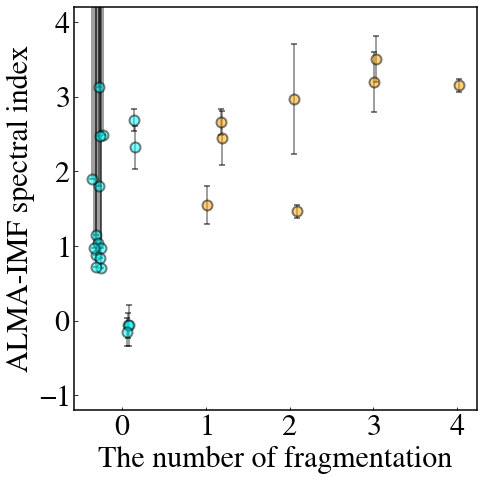

In [6]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_axes([0.15,0.15,0.8,0.8])
w51n_ind, w51n_si = plot_alpha_multiplicity(ax1, cat_w51n, w51n_b3_almaimf_conv, w51n_b6_almaimf_conv, w51n_b3_tt0, w51n_b6_briggs, catalog_w51n,
                            b6index=[11, 18, 24, 36, 37, 42, 48, 50, 52, 56, 63, 65, 69, 73, 75, 77, 86, 91, 94, 101, 102, 113] ,marker='o',label='w51n')
ax1.tick_params(axis="y",direction="in")
ax1.tick_params(axis="x",direction="in")
ax1.set_xticks([0,1,2,3,4])
[x.set_linewidth(1.5) for x in ax1.spines.values()]
print(w51n_ind)
print(w51n_si)

hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
hohoh
[]
[0, 1, 3, 4, 7, 9, 11, 12, 13, 14, 15, 18, 27]
[0.5499384465844018, 2.810531253074086, 2.5071996801717376, 2.4240528033952424, 2.5878649759288583, 1.8641496810767755, 2.6402531111097662, 2.442465182282275, 2.2640123042321174, 2.2188073486656643, 3.4743239677856237, 2.3933992051571487, 1.9132903504094545]


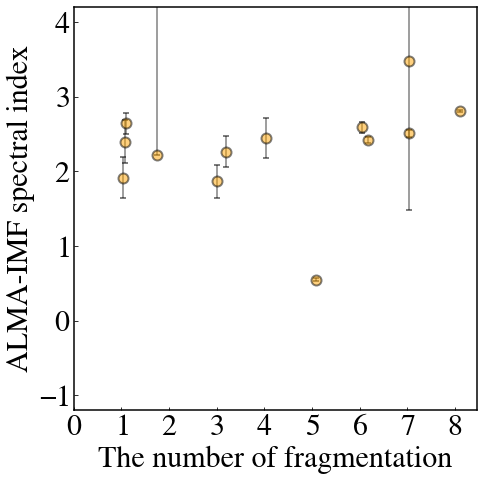

In [7]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_axes([0.15,0.15,0.8,0.8])
w51e_ind,w51e_si = plot_alpha_multiplicity(ax1, cat_w51e, w51e_b3_almaimf_conv, w51e_b6_almaimf_conv, w51e2_b3_tt0, w51e_b6_briggs, catalog_w51e,
                            b6index=[] ,marker='o',label='w51e')
ax1.tick_params(axis="y",direction="in")
ax1.tick_params(axis="x",direction="in")
ax1.set_xticks([0,1,2,3,4,5,6,7,8])
[x.set_linewidth(1.5) for x in ax1.spines.values()]
print(w51e_ind)
print(w51e_si)

(3840, 3840)


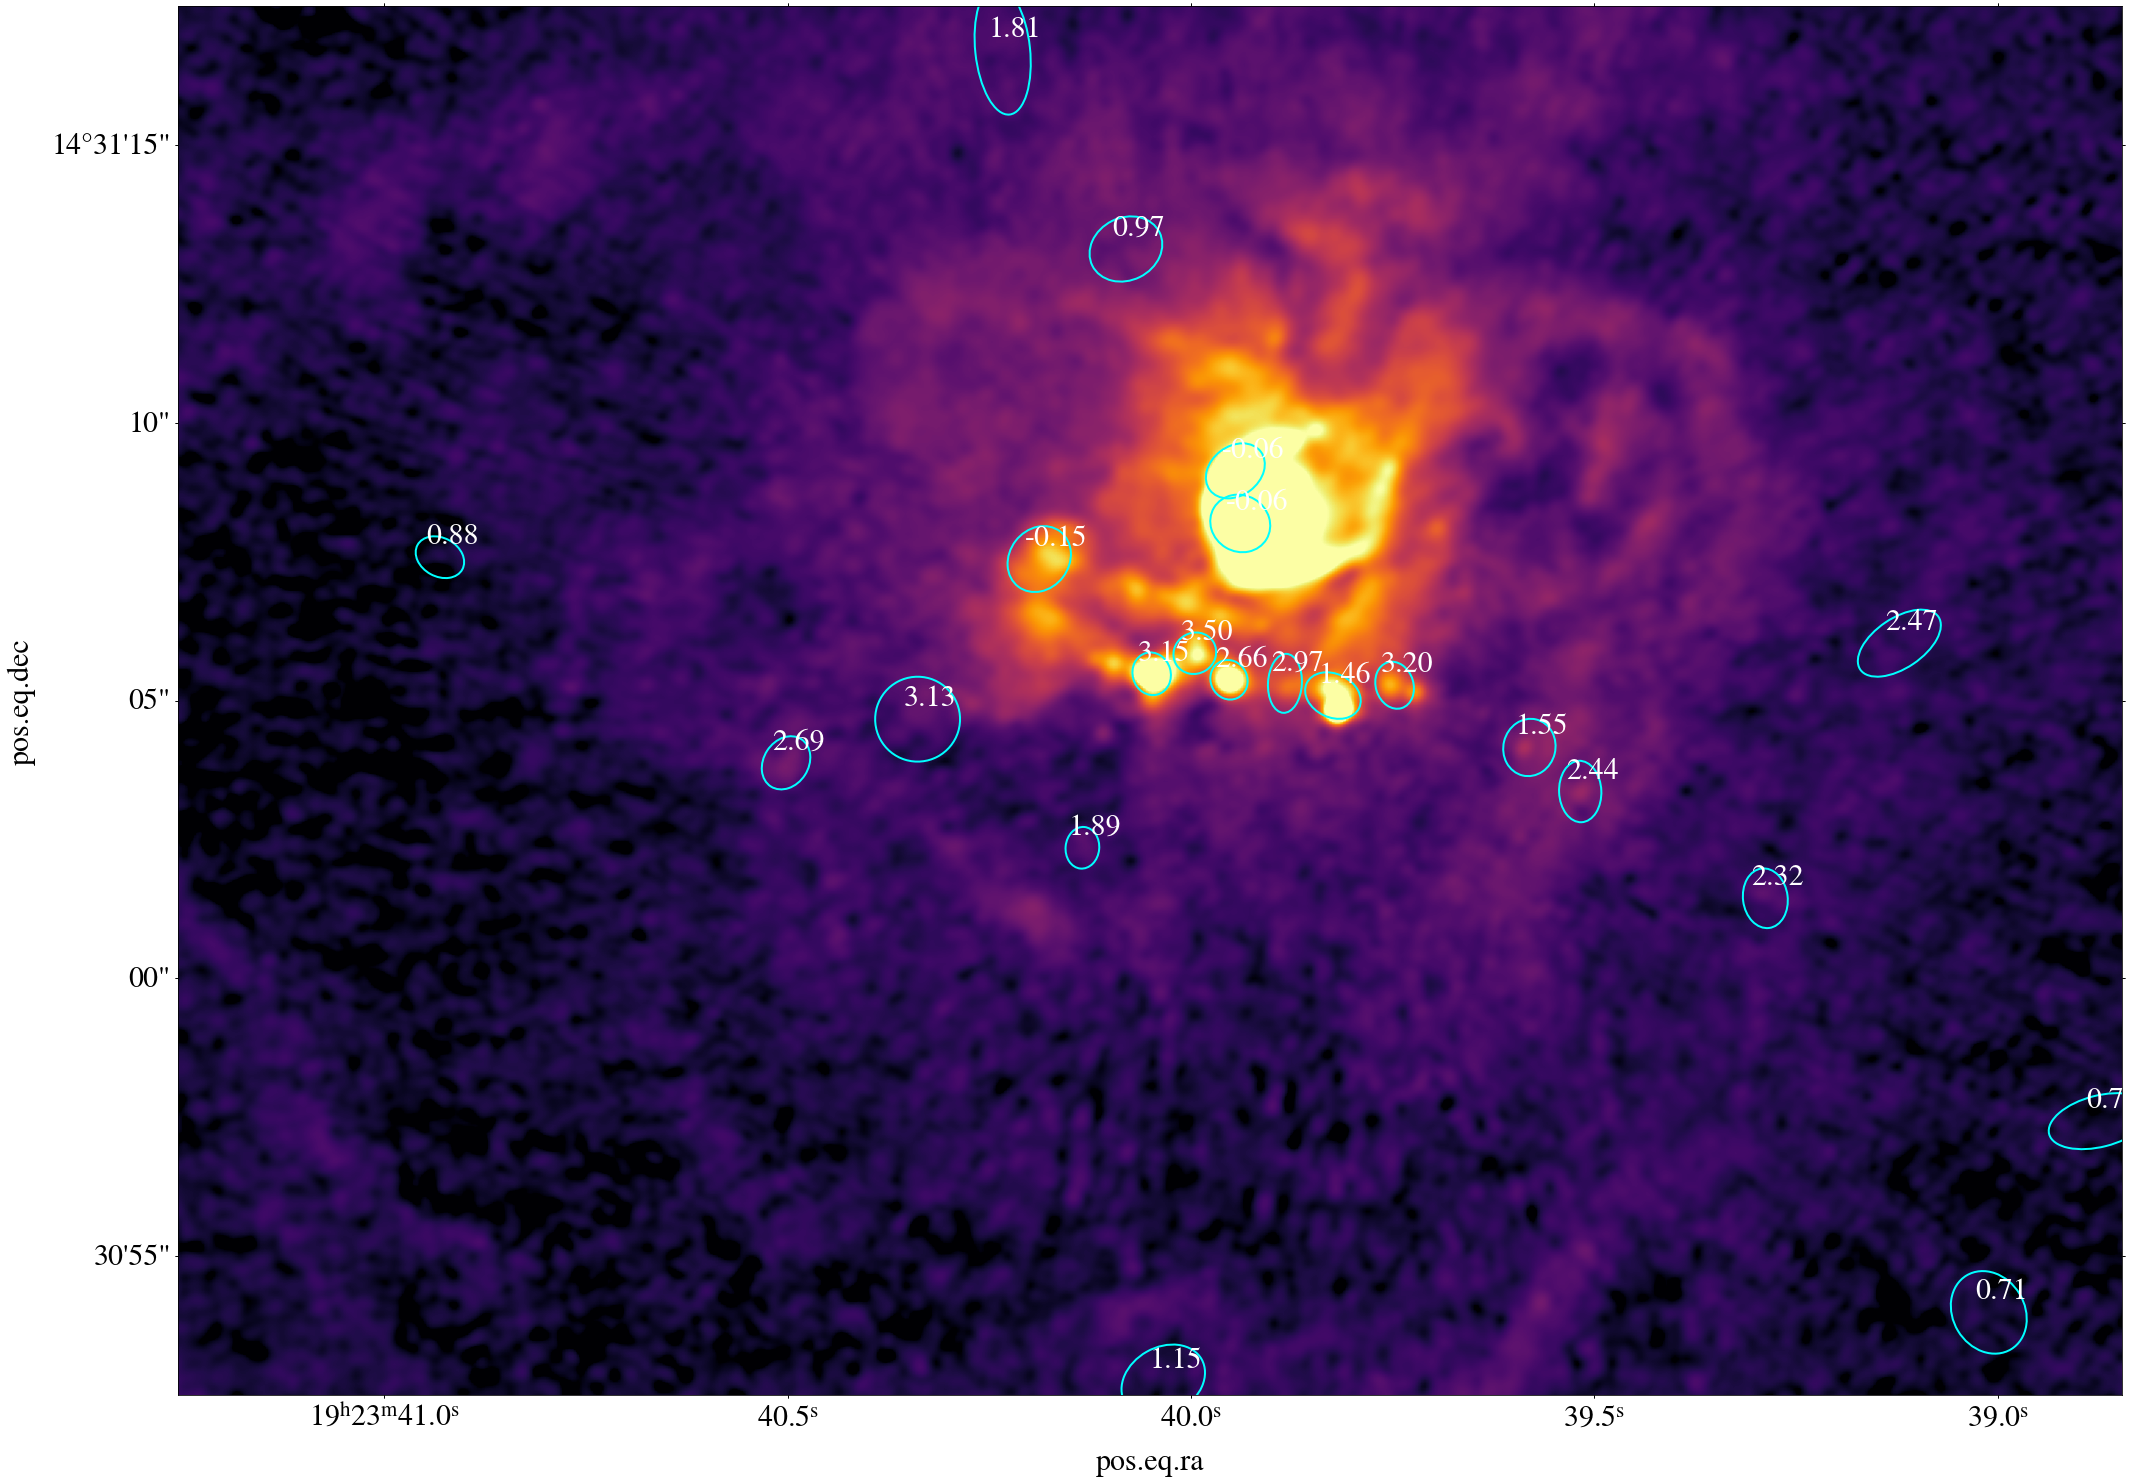

In [8]:
from matplotlib.patches import Rectangle, Ellipse
from matplotlib import colors

fitsdata_b3 = fits.open(w51n_b3_almaimf)
hdrNB3 = fits.getheader(w51n_b3_almaimf)  
wcsNB3 = WCS(hdrNB3,naxis=2)
scaleNB3 = wcsNB3.proj_plane_pixel_scales()[0]
beamNB3 = Beam.from_fits_header(hdrNB3)

fig = plt.figure(figsize=(30,30))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection=wcsNB3)
imageb3 = fitsdata_b3[0].data[0][0]
ax1.imshow(imageb3, origin='lower',cmap=plt.get_cmap('inferno'),norm=colors.PowerNorm(gamma=0.5,vmin=-0.0001090,vmax=0.013388935))
catw51n = catdata(cat_w51n, band='B3')

skypos = np.vstack((catw51n.sky_ra, catw51n.sky_dec)).T
pixpos = wcsNB3.wcs_world2pix(skypos,0)

    
for i in range(len(w51n_ind)):
    
    meanbeamsize = (beamNB3.major.value+beamNB3.minor.value)/4
    major = (catw51n.afwhm[w51n_ind][i]/3600+meanbeamsize)/scaleNB3.value
    minor = (catw51n.bfwhm[w51n_ind][i]/3600+meanbeamsize)/scaleNB3.value
    pa = 180-catw51n.theta[w51n_ind][i]

    ellipse = Ellipse(pixpos[w51n_ind][i],width=major,height=minor,facecolor='none',angle=pa,edgecolor='cyan',lw=2)
    ax1.add_patch(ellipse)
    ax1.text(pixpos[w51n_ind][i][0]-5,pixpos[w51n_ind][i][1]+5,"%0.2f"%w51n_si[i],color='w',clip_on=True,fontsize=30)
ax1.set_xlim(1500,2200)
ax1.set_ylim(1700,2200)
print(imageb3.shape)

(1120, 1120)


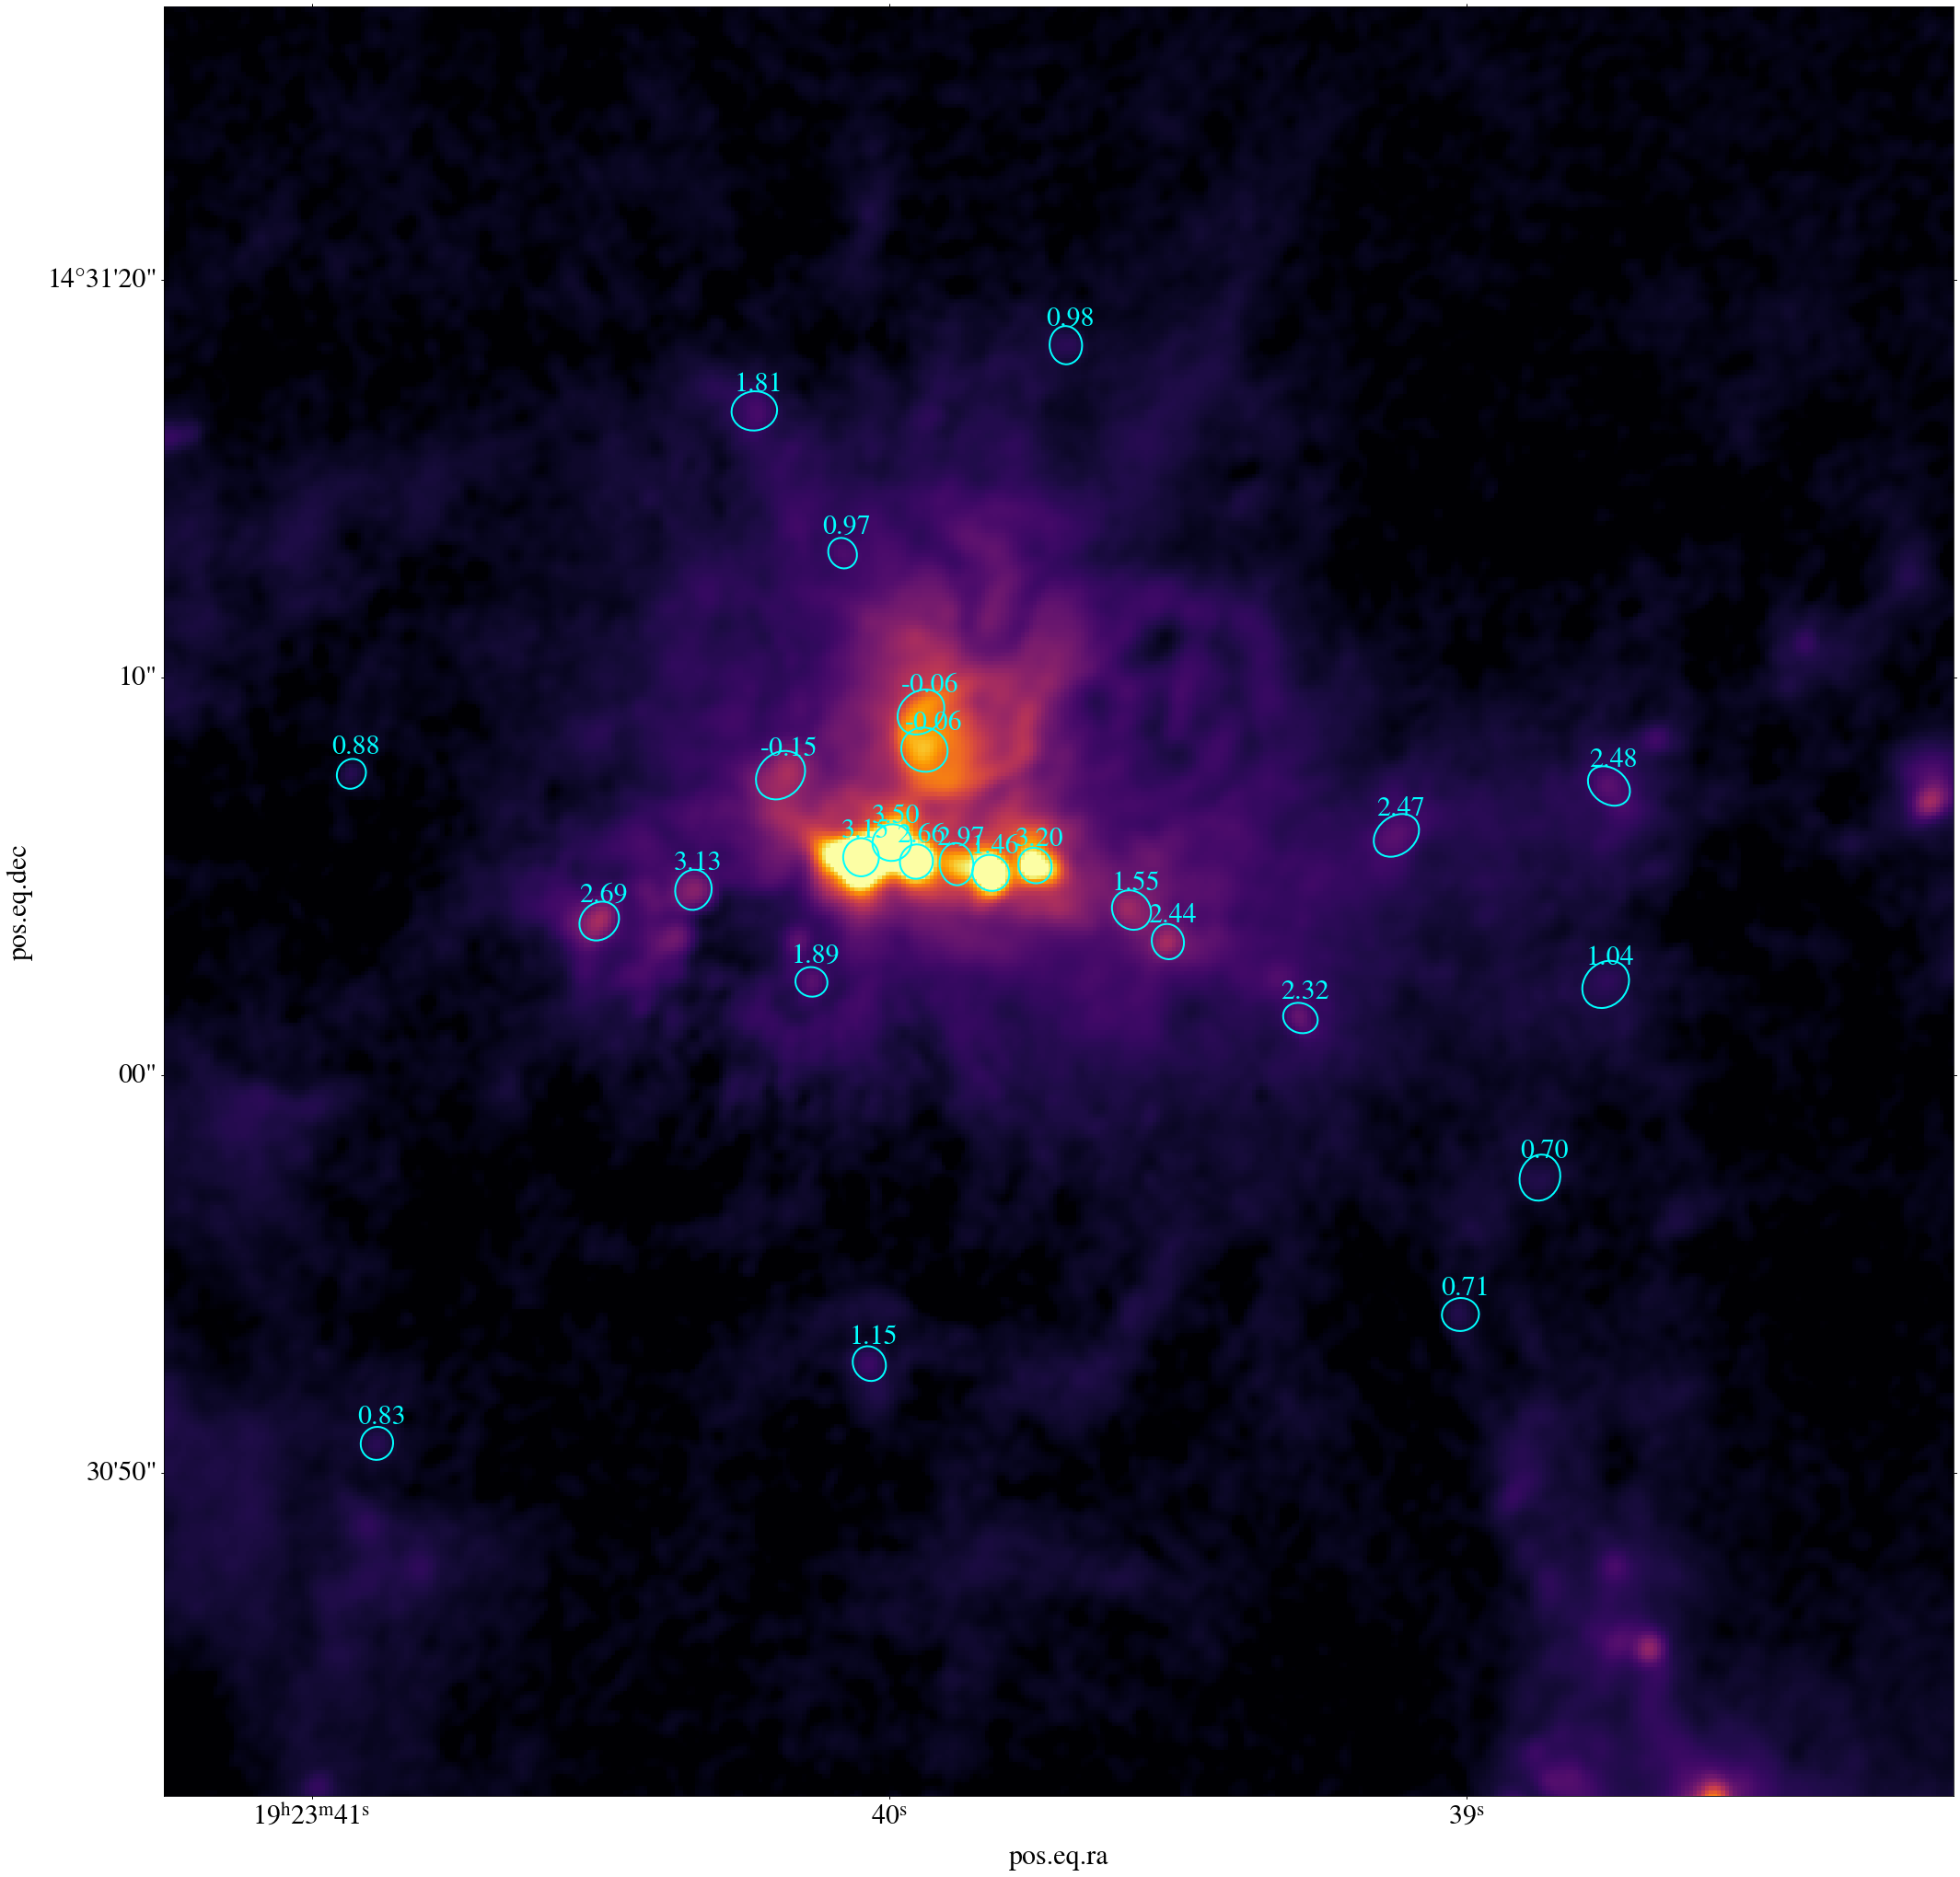

In [9]:
from matplotlib.patches import Rectangle, Ellipse
from matplotlib import colors

fitsdata_b3 = fits.open(w51n_b6_almaimf)
hdrNB3 = fits.getheader(w51n_b6_almaimf)  
wcsNB3 = WCS(hdrNB3,naxis=2)
scaleNB3 = wcsNB3.proj_plane_pixel_scales()[0]
beamNB3 = Beam.from_fits_header(hdrNB3)

fig = plt.figure(figsize=(30,30))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection=wcsNB3)
imageb3 = fitsdata_b3[0].data[0][0]
ax1.imshow(imageb3, origin='lower',cmap=plt.get_cmap('inferno'),norm=colors.PowerNorm(gamma=0.5,vmin=-0.0001090,vmax=0.13388935))
catw51n = catdata(cat_w51n, band='B6')
catw51e = catdata(cat_w51e, band='B6')

skypos = np.vstack((catw51n.sky_ra, catw51n.sky_dec)).T
pixpos = wcsNB3.wcs_world2pix(skypos,0)

    
for i in range(len(w51n_ind)):
    
    meanbeamsize = (beamNB3.major.value+beamNB3.minor.value)/4
    major = (catw51n.afwhm[w51n_ind][i]/3600+meanbeamsize)/scaleNB3.value
    minor = (catw51n.bfwhm[w51n_ind][i]/3600+meanbeamsize)/scaleNB3.value
    pa = 180-catw51n.theta[w51n_ind][i]

    ellipse = Ellipse(pixpos[w51n_ind][i],width=major,height=minor,facecolor='none',angle=pa,edgecolor='cyan',lw=2)
    ax1.add_patch(ellipse)
    ax1.text(pixpos[w51n_ind][i][0]-5,pixpos[w51n_ind][i][1]+5,"%0.2f"%w51n_si[i],color='cyan',clip_on=True,fontsize=30)
ax1.set_xlim(350,800)
ax1.set_ylim(350,800)
print(imageb3.shape)

0.002275 1.816


(-1.0, 9.0)

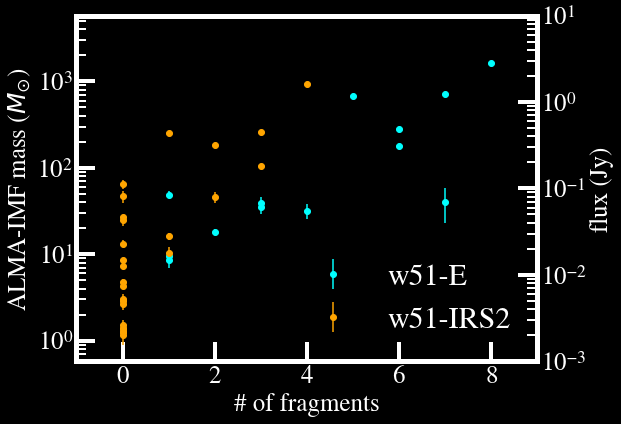

In [10]:
def get_mass(flux, dist=5.41, dusttemp = 20, opacity=0.01): # in solar mass
    return 300*flux/(dusttemp/20)*(dist/3.9)**2/(opacity/0.01)
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
plt.style.use('dark_background')
mpl.rcParams['xtick.major.size'] = 19
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 19
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth']=5
w51e_cat_almaimf = Table.read('alma_imf_on_the_img_w51e.fits',format='fits')
w51n_cat_almaimf = Table.read('alma_imf_on_the_img_w51n.fits',format='fits')

w51e_almaimf_ind = w51e_cat_almaimf['index']
w51n_almaimf_ind = w51n_cat_almaimf['index']

w51n_flux = catw51n.flux[w51n_almaimf_ind]
w51e_flux = catw51e.flux[w51e_almaimf_ind]
w51n_fluxerr = catw51n.fluxerr[w51n_almaimf_ind]
w51e_fluxerr = catw51e.fluxerr[w51e_almaimf_ind]

w51n_mass = get_mass(catw51n.flux[w51n_almaimf_ind],dist=5.1)
print(np.min(catw51n.flux[w51n_almaimf_ind]),np.max(catw51n.flux[w51n_almaimf_ind]))
w51e_mass = get_mass(catw51e.flux[w51e_almaimf_ind])
w51n_masserr = get_mass(catw51n.fluxerr[w51n_almaimf_ind],dist=5.1)
w51e_masserr = get_mass(catw51e.fluxerr[w51e_almaimf_ind])

ylim1 = get_mass(0.001)
ylim2 = get_mass(10)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.errorbar(w51e_cat_almaimf['fragments'], w51e_mass, yerr=w51e_masserr,label='w51-E',marker='o',fmt='.',c='cyan')
ax1.errorbar(w51n_cat_almaimf['fragments'], w51n_mass, yerr=w51n_masserr,label='w51-IRS2',marker='o',fmt='.',c='orange')
ax1.set_xlabel('# of fragments')
ax1.set_ylabel(r'ALMA-IMF mass ($M_{\odot}$)')
ax1.set_yscale('log')
ax1.set_xticks([0,2,4,6,8])
ax2 = ax1.twinx()
ax1.set_ylim(ylim1, ylim2)
ax2.set_ylim(0.001,10)
ax2.set_yscale('log')
new_tick_locations = [1e-3,1e-2,1e-1,1,10]
ax2.set_yticks(new_tick_locations)
ax2.set_ylabel('flux (Jy)')
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
ax2.tick_params(axis="y",direction='in')
ax2.tick_params(axis="x",direction='in')
ax1.tick_params(axis="y",direction='in',which='minor')
ax1.tick_params(axis="x",direction='in',which='minor')
ax2.tick_params(axis="y",direction='in',which='minor')
ax2.tick_params(axis="x",direction='in',which='minor')
ax1.legend(frameon=False)
ax1.set_xlim(-1,9)


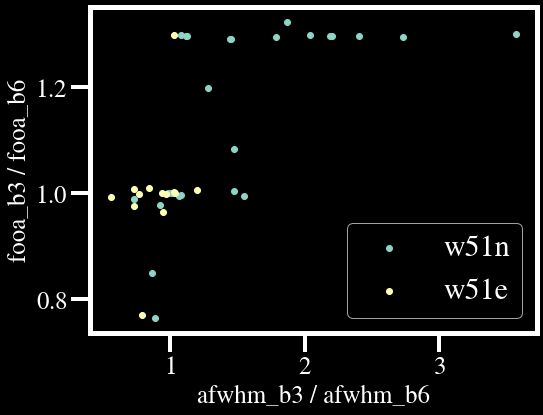

In [11]:
catw51n_b3 = catdata(cat_w51n, band='B3')
catw51n_b6 = catdata(cat_w51n, band='B6')
catw51e_b3 = catdata(cat_w51e, band='B3')
catw51e_b6 = catdata(cat_w51e, band='B6')

fig = plt.figure(figsize=(8,6))
plt.scatter(catw51n_b3.afwhm[w51n_almaimf_ind]/catw51n_b6.afwhm[w51n_almaimf_ind],
           catw51n_b3.fooa[w51n_almaimf_ind]/catw51n_b6.fooa[w51n_almaimf_ind], label='w51n')
plt.scatter(catw51e_b3.afwhm[w51e_almaimf_ind]/catw51e_b6.afwhm[w51e_almaimf_ind],
           catw51e_b3.fooa[w51e_almaimf_ind]/catw51e_b6.fooa[w51e_almaimf_ind], label='w51e')
plt.xlabel('afwhm_b3 / afwhm_b6')
plt.ylabel('fooa_b3 / fooa_b6')
plt.legend()

(-1.0, 9.0)

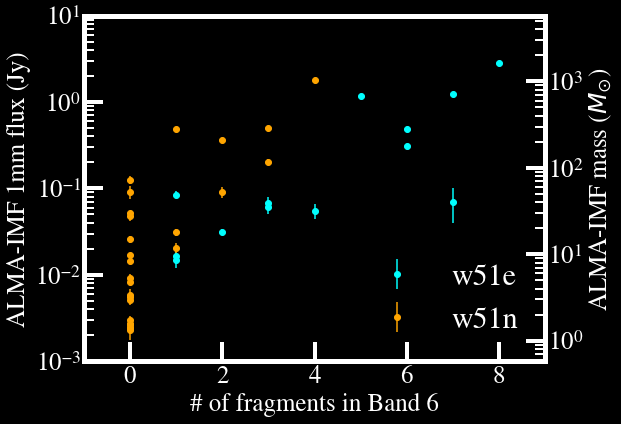

In [12]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.errorbar(w51e_cat_almaimf['fragments'], catw51e.flux[w51e_almaimf_ind], yerr=catw51e.fluxerr[w51e_almaimf_ind],label='w51e',marker='o',fmt='.',c='cyan')
ax1.errorbar(w51n_cat_almaimf['fragments'], catw51n.flux[w51n_almaimf_ind], yerr=catw51n.fluxerr[w51n_almaimf_ind],label='w51n',marker='o',fmt='.',c='orange')
ax1.set_xlabel('# of fragments in Band 6')
ax1.set_ylabel('ALMA-IMF 1mm flux (Jy)')
ax1.set_yscale('log')
ax1.set_xticks([0,2,4,6,8])
ax1.set_ylim(0.001,10)
ax2 = ax1.twinx()
ax2.set_yscale('log')
ax2.set_ylim(get_mass(0.001),get_mass(10))
ax2.set_yticks([1,10,100,1000])
ax2.set_ylabel(r'ALMA-IMF mass ($M_{\odot}$)')
#plt.plot(
ax1.legend(frameon=False)
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
ax2.tick_params(axis="y",direction='in')
ax2.tick_params(axis="x",direction='in')
ax1.tick_params(axis="y",direction='in',which='minor')
ax1.tick_params(axis="x",direction='in',which='minor')
ax2.tick_params(axis="y",direction='in',which='minor')
ax2.tick_params(axis="x",direction='in',which='minor')
ax1.set_xlim(-1,9)

(0.001, 10.0)

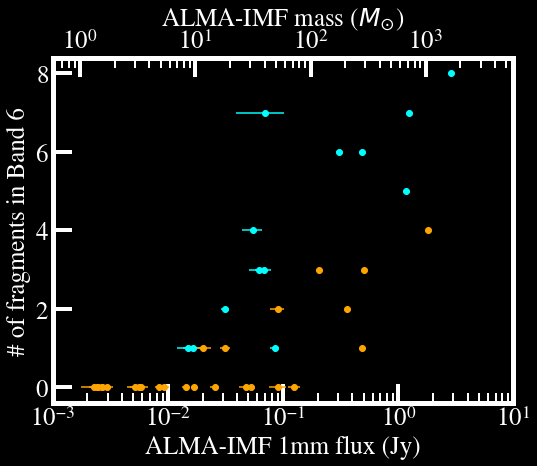

In [13]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.errorbar( catw51e.flux[w51e_almaimf_ind], w51e_cat_almaimf['fragments'],xerr=catw51e.fluxerr[w51e_almaimf_ind],label='w51-E',marker='o',fmt='.',c='cyan')
ax1.errorbar( catw51n.flux[w51n_almaimf_ind], w51n_cat_almaimf['fragments'],xerr=catw51n.fluxerr[w51n_almaimf_ind],label='w51-IRS2',marker='o',fmt='.',c='orange')
ax1.set_ylabel('# of fragments in Band 6')
ax1.set_xlabel('ALMA-IMF 1mm flux (Jy)')
ax1.set_xscale('log')
ax1.set_xticks([1e-3,1e-2,1e-1,1,10])
ax1.set_yticks([0,2,4,6,8])
ax1.set_xlim(0.001,10)
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(get_mass(0.001),get_mass(10))
ax2.set_xticks([1,10,100,1000])
ax2.set_xlabel(r'ALMA-IMF mass ($M_{\odot}$)')
#plt.plot(
#ax1.legend(frameon=False)
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
ax2.tick_params(axis="y",direction='in')
ax2.tick_params(axis="x",direction='in')
ax1.tick_params(axis="y",direction='in',which='minor')
ax1.tick_params(axis="x",direction='in',which='minor')
ax2.tick_params(axis="y",direction='in',which='minor')
ax2.tick_params(axis="x",direction='in',which='minor')
ax1.set_xlim(-1,10)

1.171 5 [0.00933128409087658, 0.0019154205219820142, 0.0019631078466773033, 7.03803935175152e-05, 0.0005147799965925515]
2.856 8 [0.001074066269211471, 0.008193612098693848, 0.0026796935126185417, 7.03803935175152e-05, 7.03803935175152e-05, 7.03803935175152e-05, 7.03803935175152e-05, 7.03803935175152e-05]
1.238 7 [0.0009235428879037499, 0.0011631047818809748, 0.001940869726240635, 0.005486370995640755, 0.000275036902166903, 7.03803935175152e-05, 7.03803935175152e-05]
0.485 6 [0.000632203824352473, 0.002386924810707569, 0.0011399181094020605, 0.00031703768763691187, 7.03803935175152e-05, 7.03803935175152e-05]
0.3071 6 [0.0007999201770871878, 0.0006100578466430306, 0.0012618552427738905, 0.0005406144773587584, 0.0007014624425210059, 0.0007778152357786894]
0.06159 3 [0.0012472550151869655, 0.0007884643855504692, 0.0008371498552151024]
0.08442 1 [0.0009011493530124426]
0.05473 4 [7.03803935175152e-05, 7.03803935175152e-05, 7.03803935175152e-05, 0.00032683039898984134]
0.06794 3 [0.00034781

Text(0.5, 0, 'ALMA-IMF mass $(M_\\odot)$')

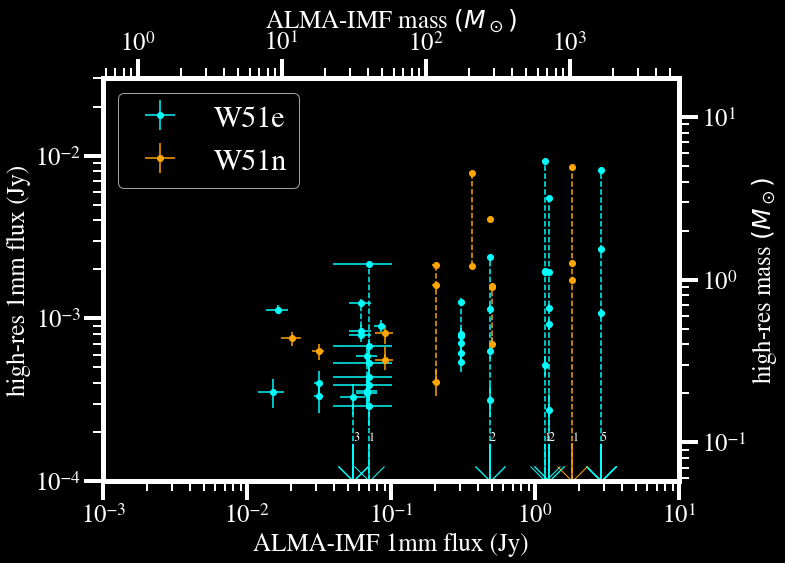

In [14]:
hdr_hr_w51e_b6 = fits.getheader(w51e_b6_briggs)
hdr_lr_w51e_b6 = fits.getheader(w51e_b6_almaimf)
hdr_hr_w51n_b6 = fits.getheader(w51n_b6_briggs)
hdr_lr_w51n_b6 = fits.getheader(w51n_b6_almaimf)
def compare_fluxes(ax, flux_lr, fluxerr_lr,hdr_lr, hrdata, hr_noiseregion,cat_w51, dendrocatalog, index,dist=5.41,
                   color='orange', plot_method='total'):
    dendrosky = np.vstack((dendrocatalog['x_sky'], dendrocatalog['y_sky'])).T
    hdr_hr = fits.getheader(hrdata)

    multiple, multipleind = multiplicity(hdr_lr, hdr_hr, cat_w51, dendrosky, index = index)
    hrflux = dendrocatalog['b6flux']
    
    hrfluxerr = measure_rms(hrdata, hr_noiseregion) 
    if plot_method=='total':

        for i in range(len(index)):
            count=0
            print(flux_lr[i],len(hrflux[multipleind[i]]),list(hrflux[multipleind[i]]))
            for j in range(len(multipleind[i])):
                if hrflux[multipleind[i][j]]==np.min(hrflux):
                    ss = ax.errorbar(flux_lr[i], 1e-4,xerr=fluxerr_lr[i],yerr=hrfluxerr,color=color, marker='x',fmt='.',markersize=30)
                    count=count+1
            
                else:
                    ss = ax.errorbar(flux_lr[i], hrflux[multipleind[i][j]],xerr=fluxerr_lr[i],yerr=hrfluxerr,color=color, marker='o',fmt='.')
            if len(hrflux[multipleind[i]])>0:
                ax.vlines(flux_lr[i], np.max([1e-4,np.min(hrflux[multipleind[i]])]),np.max(hrflux[multipleind[i]]),ls='dashed',color=color)
            if count>0:
                ax.text(flux_lr[i], 1.8e-4, '%d'%count, c='w',fontsize=12)
    
    elif plot_method=='max':
        for i in range(len(index)):
            if len(multipleind[i])==0:
                hrflux_plot=1e-99
            else:
                hrflux_plot = np.max(hrflux[multipleind[i]])
            ss = ax.errorbar(flux_lr[i], hrflux_plot ,xerr=fluxerr_lr[i],yerr=hrfluxerr,color=color, marker='o',fmt='.')
    elif plot_method=='sum':
        for i in range(len(index)):
            ss = ax.errorbar(flux_lr[i], np.sum(hrflux[multipleind[i]]),xerr=fluxerr_lr[i],yerr=hrfluxerr,color=color, marker='o',fmt='.')
            
    return ss
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ss1 = compare_fluxes(ax1,w51e_flux,w51e_fluxerr, hdr_lr_w51e_b6, w51e_b6_conv,w51e_b6_noiseregion,catdata(cat_w51e, band='B6'),catalog_w51e,w51e_almaimf_ind,color='cyan')
ss2 = compare_fluxes(ax1,w51n_flux,w51n_fluxerr, hdr_lr_w51n_b6, w51n_b6_conv,w51n_b6_noiseregion,catdata(cat_w51n, band='B6'),catalog_w51n,w51n_almaimf_ind)
ax2 = ax1.twinx()
ax3 = ax1.twiny()


ax1.set_xlim(1e-3,10)
ax1.set_xscale('log')
ax1.set_ylabel('high-res 1mm flux (Jy)')
ax1.set_xlabel('ALMA-IMF 1mm flux (Jy)')
ax1.set_yscale('log')
ax1.legend((ss1, ss2), ('W51e', 'W51n'))
ax1.set_ylim(1e-4,3e-2)
ax2.set_ylim(get_mass(ax1.get_ylim()[0]),get_mass(ax1.get_ylim()[1]))
ax2.set_yticks([0.1,1])
ax2.set_yscale('log')
ax3.set_xlim(get_mass(ax1.get_xlim()[0]),get_mass(ax1.get_xlim()[1]))
ax3.set_xticks([10,100,1000])
ax3.set_xscale('log')
ax2.set_ylabel('high-res mass $(M_\odot)$')
ax3.set_xlabel('ALMA-IMF mass $(M_\odot)$')

(350.0, 800.0)

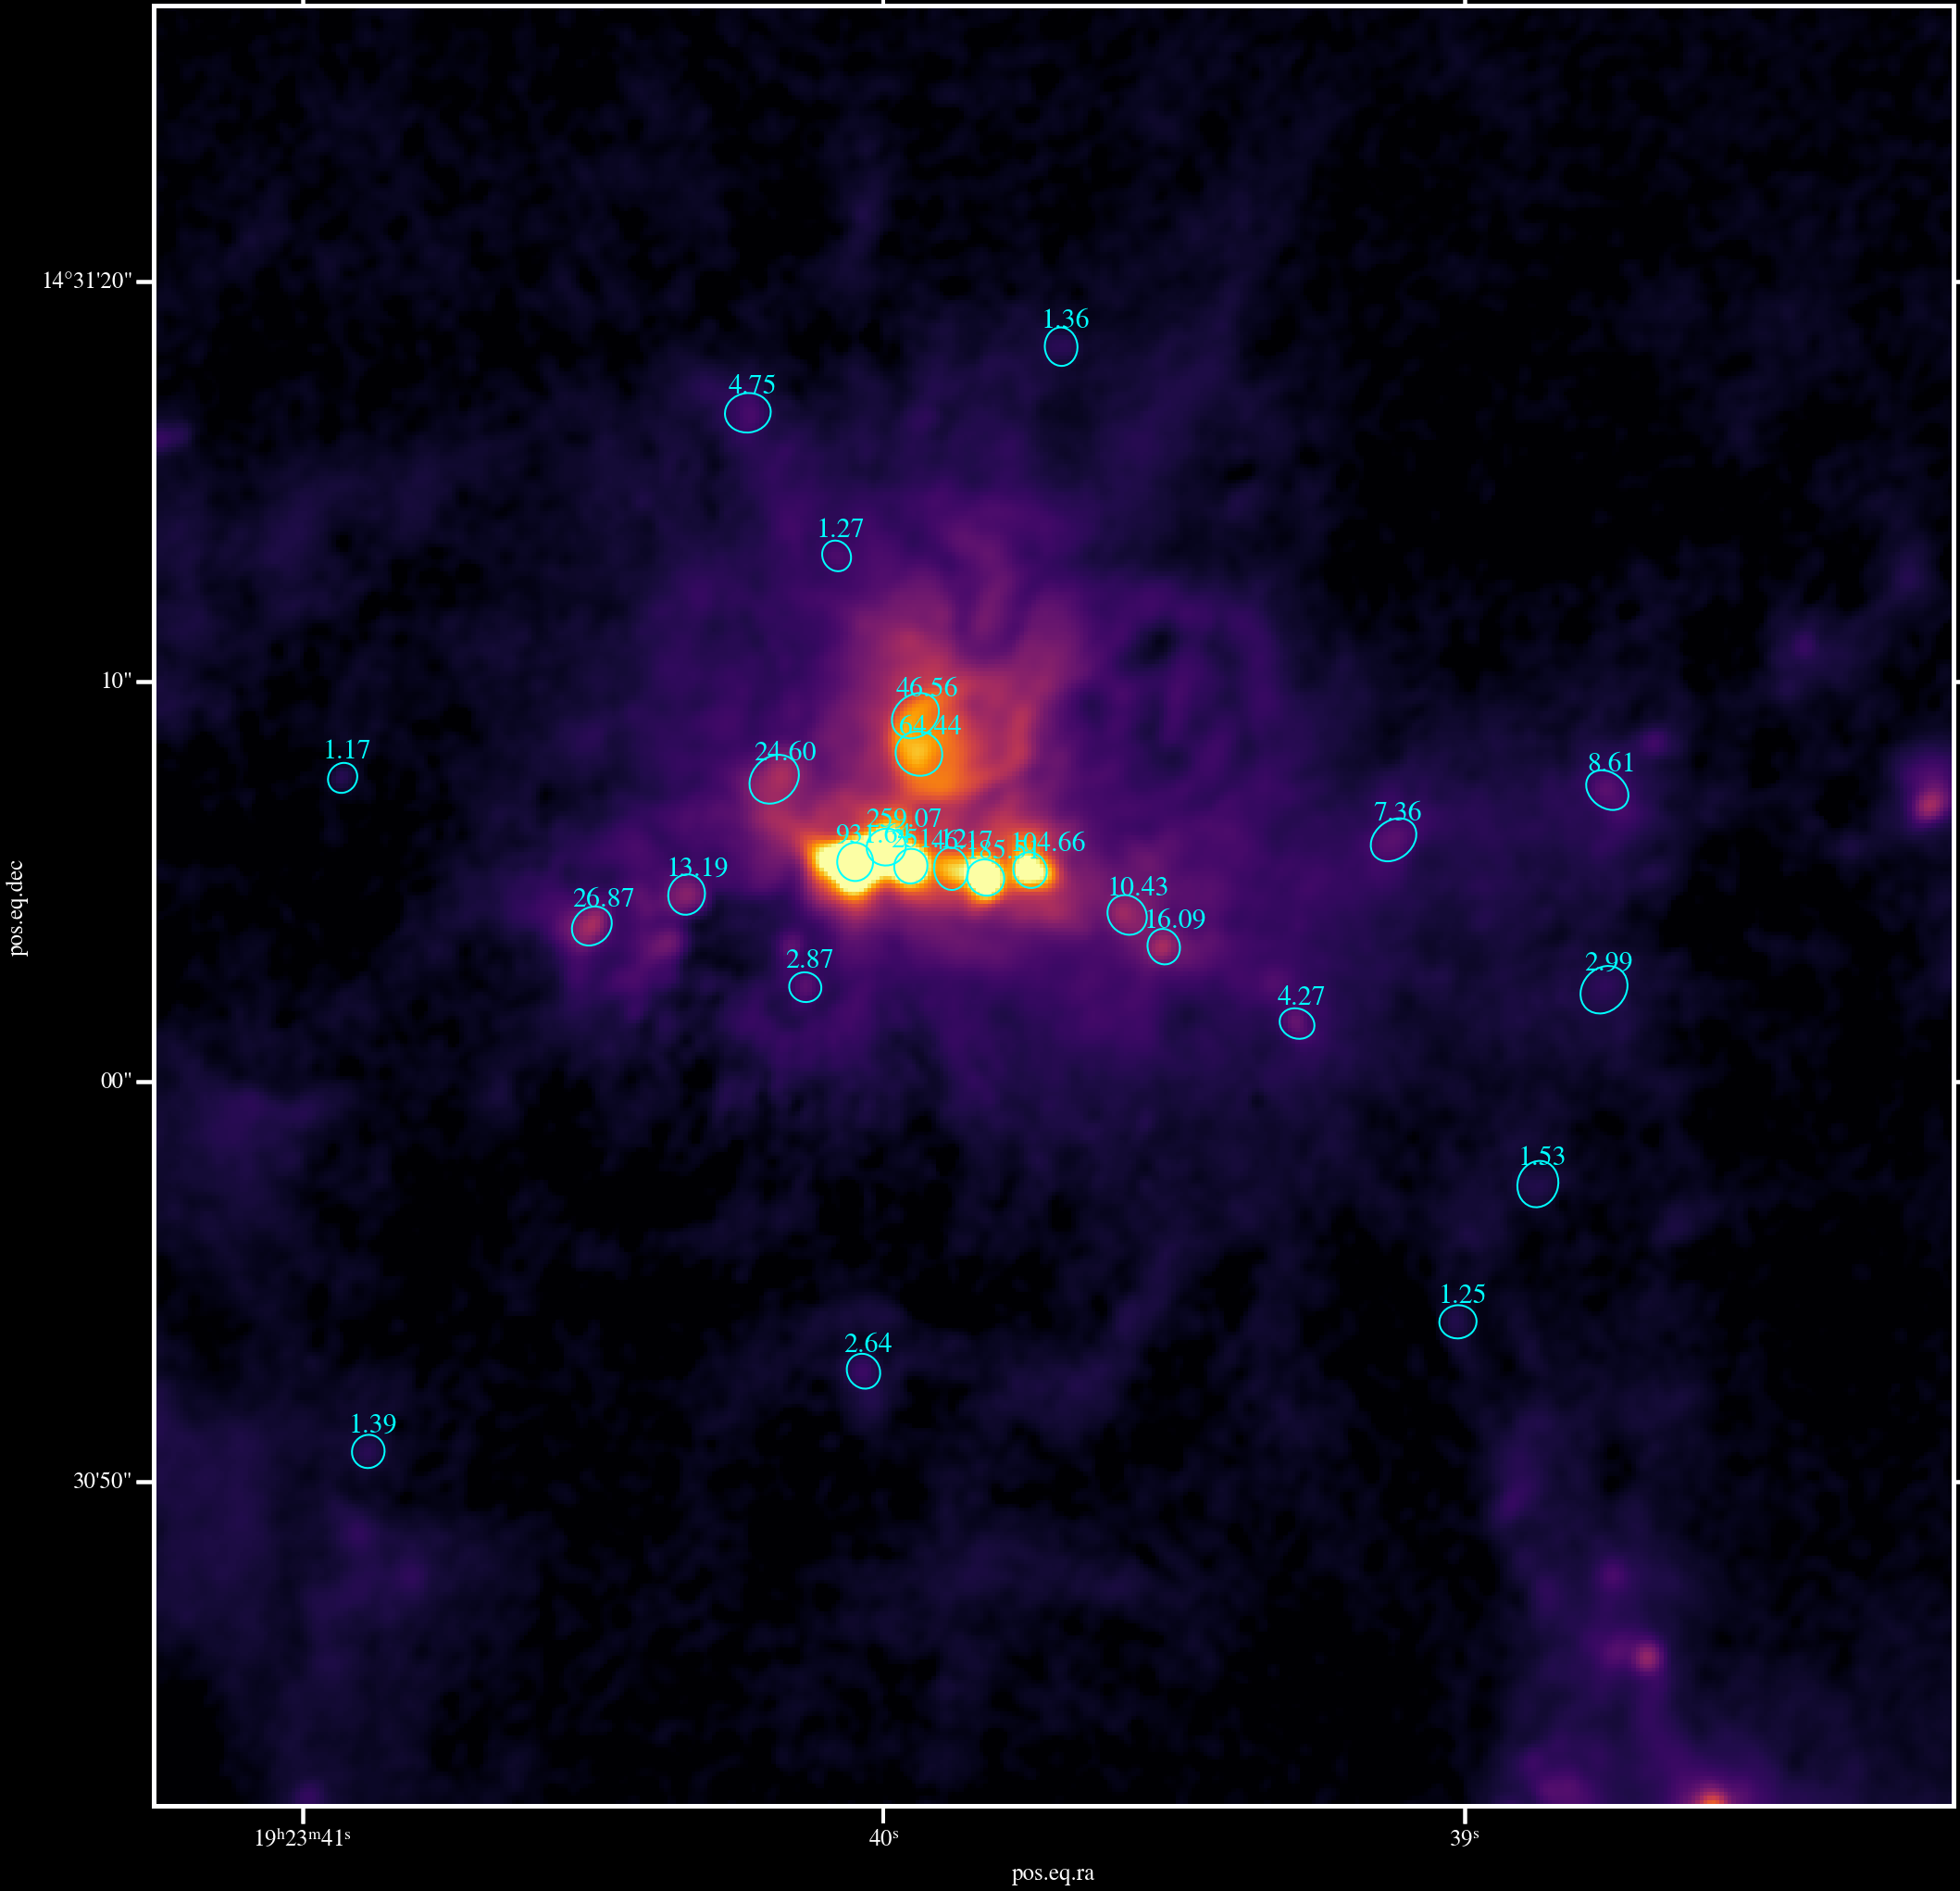

In [15]:
fitsdata_b3 = fits.open(w51n_b6_almaimf)
hdrNB3 = fits.getheader(w51n_b6_almaimf)  
wcsNB3 = WCS(hdrNB3,naxis=2)
scaleNB3 = wcsNB3.proj_plane_pixel_scales()[0]
beamNB3 = Beam.from_fits_header(hdrNB3)

fig = plt.figure(figsize=(30,30))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection=wcsNB3)
imageb3 = fitsdata_b3[0].data[0][0]
ax1.imshow(imageb3, origin='lower',cmap=plt.get_cmap('inferno'),norm=colors.PowerNorm(gamma=0.5,vmin=-0.0001090,vmax=0.13388935))
catw51n = catdata(cat_w51n, band='B6')
catw51e = catdata(cat_w51e, band='B6')

skypos = np.vstack((catw51n.sky_ra, catw51n.sky_dec)).T
pixpos = wcsNB3.wcs_world2pix(skypos,0)

    
for i in range(len(w51n_ind)):
    
    meanbeamsize = (beamNB3.major.value+beamNB3.minor.value)/4
    major = (catw51n.afwhm[w51n_ind][i]/3600+meanbeamsize)/scaleNB3.value
    minor = (catw51n.bfwhm[w51n_ind][i]/3600+meanbeamsize)/scaleNB3.value
    pa = 180-catw51n.theta[w51n_ind][i]

    ellipse = Ellipse(pixpos[w51n_ind][i],width=major,height=minor,facecolor='none',angle=pa,edgecolor='cyan',lw=2)
    ax1.add_patch(ellipse)
    ax1.text(pixpos[w51n_ind][i][0]-5,pixpos[w51n_ind][i][1]+5,"%0.2f"%w51n_mass[i],color='cyan',clip_on=True,fontsize=30)
ax1.set_xlim(350,800)
ax1.set_ylim(350,800)

      AFWHM02       
--------------------
 0.01703710421539481
0.015054119296920592
0.016763887465405535
0.017597136739128494
0.015484342957537192
 0.01841678698909633
0.022273964636003802
                 ...
0.020456640552364704
 0.02122683980685937
0.023180154128049687
 0.01587006072222794
0.013235558938394664
0.016097535301404533
0.012480194982541954
Length = 26 rows
[3.04387324e-15 1.18928159e-15 6.36212606e-16 7.68180733e-16
 4.55459621e-16 6.94926762e-17 9.42095914e-17 1.96458055e-17
 7.57057971e-17 6.63752967e-17 2.64553310e-18 1.33610233e-16
 3.69259651e-17 2.37758998e-17 1.21864749e-17 2.76984902e-17
 9.90264514e-18 7.42617543e-18 2.67149643e-17 8.96131078e-18
 1.24363785e-17 3.87854329e-18 5.05379733e-18 2.00305015e-17
 5.28568815e-18 1.05282221e-17] g / cm3
[0.00683881 0.01094087 0.01495867 0.01361327 0.01767947 0.04526104
 0.03887286 0.0851254  0.04336402 0.04631171 0.23197302 0.03264181
 0.06209093 0.07737944 0.10808241 0.07169123 0.1198998  0.1384559
 0.07299898 0.126039

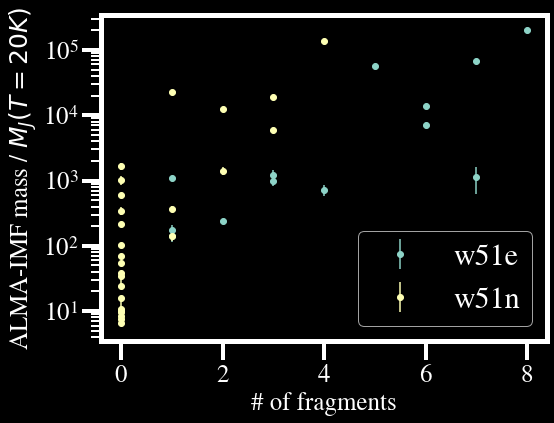

In [16]:
def jeans_mass(rho, T):
    
    jeansmass = 1/8 * (np.pi * c.k_B * T / c.G / (2.37*c.u))**(3/2) / rho**(1/2)
    
    return jeansmass
fwhm_phy_w51n = (catw51n.afwhm[w51n_almaimf_ind]+catw51n.bfwhm[w51n_almaimf_ind])/2/3600*np.pi/180 * 5.1e3 #pc
print(fwhm_phy_w51n)
mass_den_w51n = w51n_mass / (4/3 * np.pi * (fwhm_phy_w51n)**3 )
print((mass_den_w51n*u.M_sun/u.pc**3).to(u.g/u.cm**3))
mass_j_w51n = jeans_mass(mass_den_w51n*u.M_sun/u.pc**3, 20*u.K)
multi_jean_w51n = w51n_mass / mass_j_w51n.to(u.M_sun)
multierr_jean_w51n = w51n_masserr / mass_j_w51n.to(u.M_sun)
print(mass_j_w51n.to(u.M_sun))
fwhm_phy_w51e = (catw51e.afwhm[w51e_almaimf_ind]+catw51e.bfwhm[w51e_almaimf_ind])/2/3600*np.pi/180 * 5.41e3 #pc
mass_den_w51e = w51e_mass / (4/3 * np.pi * (fwhm_phy_w51e)**3 )
mass_j_w51e = jeans_mass(mass_den_w51e*u.M_sun/u.pc**3, 20*u.K)
multi_jean_w51e = w51e_mass / mass_j_w51e.to(u.M_sun)
multierr_jean_w51e = w51e_masserr / mass_j_w51e.to(u.M_sun)
print(mass_j_w51e.to(u.M_sun))


fig = plt.figure(figsize=(8,6))
plt.errorbar(w51e_cat_almaimf['fragments'], multi_jean_w51e, yerr=multierr_jean_w51e,label='w51e',marker='o',fmt='.')
plt.errorbar(w51n_cat_almaimf['fragments'], multi_jean_w51n, yerr=multierr_jean_w51n,label='w51n',marker='o',fmt='.')
plt.xlabel('# of fragments')
plt.ylabel('ALMA-IMF mass / $M_J(T=20K)$')
plt.yscale('log')
plt.xticks([0,2,4,6,8])
#plt.plot(
plt.legend()


675.994972386588 5.386764416177217
675.994972386588 1.1057341100477673
675.994972386588 1.1332630526101775
675.994972386588 0.04062919912248496
675.994972386588 0.2971722370467546
1648.7119053254441 0.6200370606293544
1648.7119053254441 4.73000903877281
1648.7119053254441 1.5469336823800939
1648.7119053254441 0.04062919912248496
1648.7119053254441 0.04062919912248496
1648.7119053254441 0.04062919912248496
1648.7119053254441 0.04062919912248496
1648.7119053254441 0.04062919912248496
714.6727376725839 0.5331429111924211
714.6727376725839 0.6714372202479402
714.6727376725839 1.1204254286900106
714.6727376725839 3.1671726812132786
714.6727376725839 0.1587733245820737
714.6727376725839 0.04062919912248496
714.6727376725839 0.04062919912248496
279.9808382642999 0.3649586736002095
279.9808382642999 1.377924143042805
279.9808382642999 0.6580520161299893
279.9808382642999 0.18301954133187184
279.9808382642999 0.04062919912248496
279.9808382642999 0.04062919912248496
177.2827122287969 0.46177798

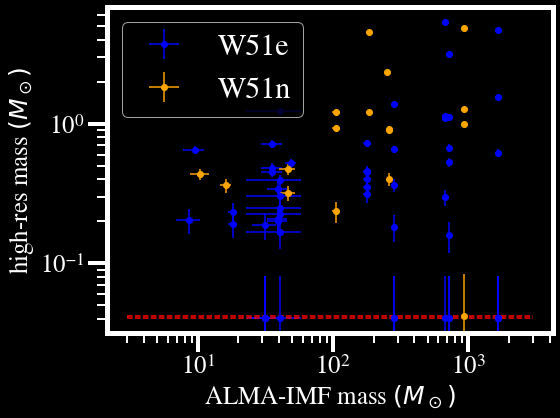

In [17]:
def compare_masses( mass_lr, masserr_lr,hdr_lr, hrdata, hr_noiseregion,cat_w51, dendrocatalog, index,dist=5.41,color='orange'):
    dendrosky = np.vstack((dendrocatalog['x_sky'], dendrocatalog['y_sky'])).T
    hdr_hr = fits.getheader(hrdata)

    multiple, multipleind = multiplicity(hdr_lr, hdr_hr, cat_w51, dendrosky, index = index)
    hrflux = dendrocatalog['b6flux']
    hrmass = get_mass(hrflux, dist=dist)
    hrfluxerr = measure_rms(hrdata, hr_noiseregion) 
    hrmasserr = get_mass(hrfluxerr, dist=dist)
    for i in range(len(index)):
        for j in range(len(multipleind[i])):
            print(mass_lr[i],  hrmass[multipleind[i][j]])
            ss = plt.errorbar(mass_lr[i], hrmass[multipleind[i][j]],xerr=masserr_lr[i],yerr=hrmasserr,color=color, marker='o',fmt='.')
    plt.hlines(hrmasserr, 3, 3000, colors='r', ls='dashed')
    return ss
hdr_hr_w51e_b6 = fits.getheader(w51e_b6_briggs)
hdr_lr_w51e_b6 = fits.getheader(w51e_b6_almaimf)
hdr_hr_w51n_b6 = fits.getheader(w51n_b6_briggs)
hdr_lr_w51n_b6 = fits.getheader(w51n_b6_almaimf)
fig = plt.figure(figsize=(8,6))
ss1 = compare_masses(w51e_mass,w51e_masserr, hdr_lr_w51e_b6, w51e_b6_conv,w51e_b6_noiseregion,catdata(cat_w51e, band='B6'),catalog_w51e,w51e_almaimf_ind,color='b')
ss2 = compare_masses(w51n_mass,w51n_masserr, hdr_lr_w51n_b6, w51n_b6_conv,w51n_b6_noiseregion,catdata(cat_w51n, band='B6'),catalog_w51n,w51n_almaimf_ind)
plt.xscale('log')
plt.ylabel('high-res mass $(M_\odot)$')
plt.xlabel('ALMA-IMF mass $(M_\odot)$')
plt.yscale('log')
plt.legend((ss1, ss2), ('W51e', 'W51n'))




Text(0.5, 0, 'ALMA-IMF mass $(M_\\odot)$')

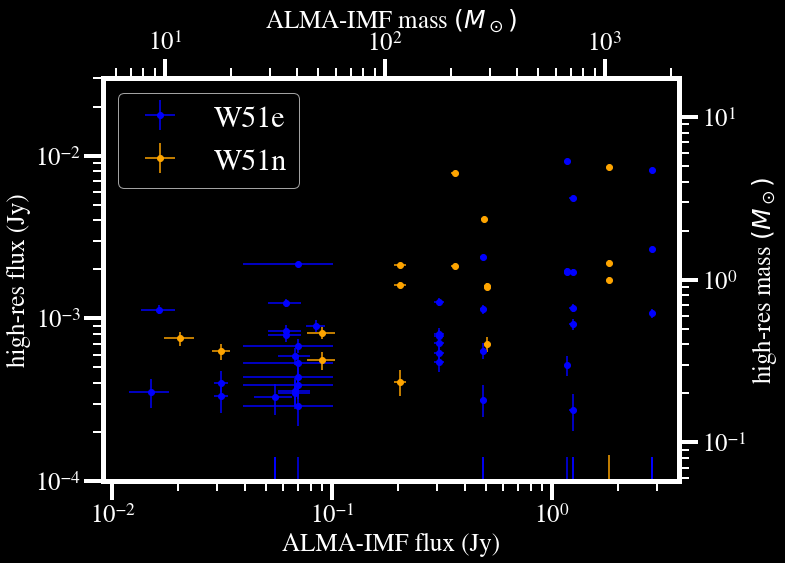

In [18]:
def compare_fluxes(ax, flux_lr, fluxerr_lr,hdr_lr, hrdata, hr_noiseregion,cat_w51, dendrocatalog, index,dist=5.41,
                   color='orange', plot_method='total'):
    dendrosky = np.vstack((dendrocatalog['x_sky'], dendrocatalog['y_sky'])).T
    hdr_hr = fits.getheader(hrdata)

    multiple, multipleind = multiplicity(hdr_lr, hdr_hr, cat_w51, dendrosky, index = index)
    hrflux = dendrocatalog['b6flux']
    
    hrfluxerr = measure_rms(hrdata, hr_noiseregion) 
    if plot_method=='total':

        for i in range(len(index)):
            for j in range(len(multipleind[i])):
                ss = ax.errorbar(flux_lr[i], hrflux[multipleind[i][j]],xerr=fluxerr_lr[i],yerr=hrfluxerr,color=color, marker='o',fmt='.')
    
    elif plot_method=='max':
        for i in range(len(index)):
            if len(multipleind[i])==0:
                hrflux_plot=1e-99
            else:
                hrflux_plot = np.max(hrflux[multipleind[i]])
            ss = ax.errorbar(flux_lr[i], hrflux_plot ,xerr=fluxerr_lr[i],yerr=hrfluxerr,color=color, marker='o',fmt='.')
    elif plot_method=='sum':
        for i in range(len(index)):
            ss = ax.errorbar(flux_lr[i], np.sum(hrflux[multipleind[i]]),xerr=fluxerr_lr[i],yerr=hrfluxerr,color=color, marker='o',fmt='.')
            
    return ss
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ss1 = compare_fluxes(ax1,w51e_flux,w51e_fluxerr, hdr_lr_w51e_b6, w51e_b6_conv,w51e_b6_noiseregion,catdata(cat_w51e, band='B6'),catalog_w51e,w51e_almaimf_ind,color='b')
ss2 = compare_fluxes(ax1,w51n_flux,w51n_fluxerr, hdr_lr_w51n_b6, w51n_b6_conv,w51n_b6_noiseregion,catdata(cat_w51n, band='B6'),catalog_w51n,w51n_almaimf_ind)
ax2 = ax1.twinx()
ax3 = ax1.twiny()



ax1.set_xscale('log')
ax1.set_ylabel('high-res flux (Jy)')
ax1.set_xlabel('ALMA-IMF flux (Jy)')
ax1.set_yscale('log')
ax1.legend((ss1, ss2), ('W51e', 'W51n'))
ax1.set_ylim(1e-4,3e-2)
ax2.set_ylim(get_mass(ax1.get_ylim()[0]),get_mass(ax1.get_ylim()[1]))
ax2.set_yticks([0.1,1])
ax2.set_yscale('log')
ax3.set_xlim(get_mass(ax1.get_xlim()[0]),get_mass(ax1.get_xlim()[1]))
ax3.set_xticks([10,100,1000])
ax3.set_xscale('log')
ax2.set_ylabel('high-res mass $(M_\odot)$')
ax3.set_xlabel('ALMA-IMF mass $(M_\odot)$')

In [19]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ss1 = compare_fluxes(ax1,w51e_flux,w51e_fluxerr, hdr_lr_w51e_b6, w51e_b6_conv,w51e_b6_noiseregion,catdata(cat_w51e, band='B6'),catalog_w51e,w51e_almaimf_ind,color='b', plot_method='sum')
ss2 = compare_fluxes(ax1,w51n_flux,w51n_fluxerr, hdr_lr_w51n_b6, w51n_b6_conv,w51n_b6_noiseregion,catdata(cat_w51n, band='B6'),catalog_w51n,w51n_almaimf_ind,plot_method='sum')
ax2 = ax1.twinx()
ax3 = ax1.twiny()



ax1.set_xscale('log')
ax1.set_ylabel('The sum of high-res flux (Jy)')
ax1.set_xlabel('ALMA-IMF flux (Jy)')
ax1.set_yscale('log')
ax1.legend((ss1, ss2), ('W51e', 'W51n'))
ax1.set_ylim(1e-4,3e-2)
ax2.set_ylim(get_mass(ax1.get_ylim()[0]),get_mass(ax1.get_ylim()[1]))
ax2.set_yticks([0.1,1])
ax2.set_yscale('log')
ax3.set_xlim(get_mass(ax1.get_xlim()[0]),get_mass(ax1.get_xlim()[1]))
ax3.set_xticks([10,100,1000])
ax3.set_xscale('log')
ax2.set_ylabel('The sum of high-res mass $(M_\odot)$')
ax3.set_xlabel('ALMA-IMF mass $(M_\odot)$')`

SyntaxError: invalid syntax (268479471.py, line 23)

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ss1 = compare_fluxes(ax1,w51e_flux,w51e_fluxerr, hdr_lr_w51e_b6, w51e_b6_conv,w51e_b6_noiseregion,catdata(cat_w51e, band='B6'),catalog_w51e,w51e_almaimf_ind,color='b', plot_method='max')
ss2 = compare_fluxes(ax1,w51n_flux,w51n_fluxerr, hdr_lr_w51n_b6, w51n_b6_conv,w51n_b6_noiseregion,catdata(cat_w51n, band='B6'),catalog_w51n,w51n_almaimf_ind,plot_method='max')
ax2 = ax1.twinx()
ax3 = ax1.twiny()



ax1.set_xscale('log')
ax1.set_ylabel('maximum high-res flux (Jy)')
ax1.set_xlabel('ALMA-IMF flux (Jy)')
ax1.set_yscale('log')
ax1.legend((ss1, ss2), ('W51e', 'W51n'))
ax1.set_ylim(1e-4,3e-2)
ax2.set_ylim(get_mass(ax1.get_ylim()[0]),get_mass(ax1.get_ylim()[1]))
ax2.set_yticks([0.1,1])
ax2.set_yscale('log')
ax3.set_xlim(get_mass(ax1.get_xlim()[0]),get_mass(ax1.get_xlim()[1]))
ax3.set_xticks([10,100,1000])
ax3.set_xscale('log')
ax2.set_ylabel('maximum high-res mass $(M_\odot)$')
ax3.set_xlabel('ALMA-IMF mass $(M_\odot)$')

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ss1 = compare_fluxes(ax1,w51e_flux,w51e_fluxerr, hdr_lr_w51e_b6, w51e_b6_conv,w51e_b6_noiseregion,catdata(cat_w51e, band='B6'),catalog_w51e,w51e_almaimf_ind,color='b', plot_method='max')
ss2 = compare_fluxes(ax1,w51n_flux,w51n_fluxerr, hdr_lr_w51n_b6, w51n_b6_conv,w51n_b6_noiseregion,catdata(cat_w51n, band='B6'),catalog_w51n,w51n_almaimf_ind,plot_method='max')
ax2 = ax1.twinx()
ax3 = ax1.twiny()



ax1.set_xscale('log')
ax1.set_ylabel('high-res flux (Jy)')
ax1.set_xlabel('ALMA-IMF flux (Jy)')
ax1.set_yscale('log')
ax1.set_ylim(1e-4,3e-2)
ax1.legend((ss1, ss2), ('W51e', 'W51n'))

ax2.set_ylim(get_mass(ax1.get_ylim()[0]),get_mass(ax1.get_ylim()[1]))
ax2.set_yticks([0.1,1])
ax2.set_yscale('log')
ax3.set_xlim(get_mass(ax1.get_xlim()[0]),get_mass(ax1.get_xlim()[1]))
ax3.set_xticks([10,100,1000])
ax3.set_xscale('log')
ax2.set_ylabel('high-res mass $(M_\odot)$')
ax3.set_xlabel('ALMA-IMF mass $(M_\odot)$')

In [ ]:
def compare_spectral_indexes(hdr_lr, hdr_hr,cat_w51, catalog_lr, dendrocatalog, index,dist=5.41,color='orange',marker='o'):
    dendrosky = np.vstack((dendrocatalog['x_sky'], dendrocatalog['y_sky'])).T

    multiple, multipleind = multiplicity(hdr_lr, hdr_hr, cat_w51, dendrosky, index = index)
    sumhr=0
    for mult in multipleind:
        sumhr = sumhr+len(mult)
    si_hr = dendrocatalog['alpha']
    kind_hr = dendrocatalog['kind']
    
    si_lr = catalog_lr['spectral_index']
    kind_lr = catalog_lr['kind']
    
    xlolims = np.zeros(len(index))
    xuplims = np.zeros(len(index))
    xuplims[np.where(kind_lr==1)[0]]=1
    xlolims[np.where(kind_lr==2)[0]]=1
    
    

    
    
    #hrmass = get_mass(hrflux, dist=dist)
    #hrfluxerr = measure_rms(hrdata, hr_noiseregion) 
    #hrmasserr = get_mass(hrfluxerr, dist=dist)
    for i in range(len(index)):
        for j in range(len(multipleind[i])):
            marker_plot=marker
            edgecolor_plot = color
            if kind_hr[multipleind[i][j]] ==1:
                marker_plot='^'
            elif kind_hr[multipleind[i][j]] ==2:
                marker_plot='v'
            if kind_lr[i] ==1:
                edgecolor_plot = 'r'
            elif kind_lr[i]==2:
                edgecolor_plot = 'purple'
            ss = plt.errorbar(si_lr[i], si_hr[multipleind[i][j]],
                              
                              c=color, marker=marker_plot,fmt='.', mec=edgecolor_plot,mew=2)
    return ss

fig = plt.figure(figsize=(8,6))
hdr_hr_w51e_b6 = fits.getheader(w51e_b6_briggs)
hdr_hr_w51n_b6 = fits.getheader(w51n_b6_briggs)

ss1 = compare_spectral_indexes(hdr_lr_w51e_b6, hdr_hr_w51e_b6, catdata(cat_w51e, band='B6'),w51e_cat_almaimf,catalog_w51e,w51e_almaimf_ind,color='b')
ss2 = compare_spectral_indexes(hdr_lr_w51n_b6, hdr_hr_w51n_b6, catdata(cat_w51n, band='B6'),w51n_cat_almaimf,catalog_w51n,w51n_almaimf_ind,color='orange')
plt.ylabel('high-res spectral index')
plt.xlabel('ALMA-IMF spectral index')
plt.legend((ss1, ss2), ('W51e', 'W51n'),fontsize=13)
plt.plot([-2.8,4],[-2.8,4],c='k',ls='dashed')

plt.xlim(-2.8,4)
plt.ylim(-2.8,4)
